**This notebook should be removed once the repo become public as it use real farm data from LiteFarm**

This notebook contains code to verify that all LiteFarm's farm can be paired with an existing ECO_ID, and then get the corresponding ecodistrict polygon and data.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import json
import plotly.express as px

In [2]:
df = pd.read_excel('../data/raw/farm_site_boundary.xlsx')

In [3]:
def string_to_polygon(s):
    # Replace single quotes with double quotes for valid JSON format
    s = s.replace("'", '"')
    # Turn the string into a list of point dictionaries
    points_list = eval(s)
    # Create a Polygon object from the list of point dictionaries
    polygon = Polygon([(point['lng'], point['lat']) for point in points_list])
    return polygon

In [4]:
df['polygon_geometry'] = df['location_grid_points'].apply(string_to_polygon)
df['point_geometry'] = [Point(x, y) for x, y in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry='point_geometry')

In [5]:
gdf.crs = "EPSG:4326"
gdf.head()

farm_id country_name   latitude   longitude  \
0  7a2e6fcc-ab78-11eb-a4ad-0242ac130002       Canada  49.059192 -122.882005   
1  36322d78-b2ac-11eb-9edf-0242ac130002       Canada  49.036135 -122.713490   
2  dee27326-b2af-11eb-a871-0242ac130002       Canada  43.944641  -79.730420   
3  1e3b98f8-ca44-11eb-8062-0242ac130002       Canada  48.995126  -58.045602   
4  33851eae-dad5-11eb-9c2f-0242ac130002       Canada  46.636528  -71.042723   

                            location_id                type  location_area_m2  \
0  605c6008-ab7e-11eb-8a94-0242ac130002  farm_site_boundary          211908.0   
1  931eeb88-b2ad-11eb-b6ac-0242ac130002  farm_site_boundary           21388.0   
2  607eb4a8-b2b0-11eb-b10e-0242ac130002  farm_site_boundary          211695.0   
3  5f708a3c-ca5c-11eb-a595-0242ac130002  farm_site_boundary            1047.0   
4  fcc4ed58-dad5-11eb-b818-0242ac130002  farm_site_boundary           52718.0   

                                location_grid_points  \
0  [{"lat": 49.05928816695972, "lng": -122.883487...   
1  [{"lat": 49.0361106915654, "lng": -122.7183954...   
2  [{"lat": 43.94351188354036, "lng": -79.7265726...   
3  [{"lat": 48.994851525201184, "lng": -58.045751...   
4  [{"lat": 46.63706792013167, "lng": -71.0435030...   

                                    polygon_geometry  \
0  POLYGON ((-122.88348775768395 49.0592881669597...   
1  POLYGON ((-122.71839542729994 49.0361106915654...   
2  POLYGON ((-79.72657263766844 43.94351188354036...   
3  POLYGON ((-58.04575132181069 48.99485152520118...   
4  POLYGON ((-71.04350309594241 46.63706792013167...   

                point_geometry  
0  POINT (-122.88200 49.05919)  
1  POINT (-122.71349 49.03613)  
2   POINT (-79.73042 43.94464)  
3   POINT (-58.04560 48.99513)  
4   POINT (-71.04272 46.63653)

In [6]:
slc_polygons = gpd.read_file("../data/external/slc")
slc_polygons = slc_polygons.set_crs('EPSG:4269', inplace=True)
slc_polygons = slc_polygons.to_crs('EPSG:4326')
slc_polygons

AREA  PERIMETER  POLY_ID  ECO_ID  \
0      1.376666   6.159230    14003      14   
1      1.580340   9.611541    14002      14   
2      0.932502   5.332157    14004      14   
3      2.408007  13.902721    14005      14   
4      3.511283  27.056163    14001      14   
...         ...        ...      ...     ...   
12348  0.011228   1.038751   572002     572   
12349  0.028866   0.843499   572004     572   
12350  0.019782   0.745984   572006     572   
12351  0.087583   1.234050   572005     572   
12352  0.040863   0.800462   572007     572   

                                                geometry  
0      POLYGON ((-73.74820 83.60566, -72.61377 83.626...  
1      POLYGON ((-70.91842 83.63315, -69.65201 83.612...  
2      POLYGON ((-75.75444 83.56109, -74.13673 83.597...  
3      POLYGON ((-77.61654 83.51138, -76.16966 83.550...  
4      POLYGON ((-67.62450 83.54608, -65.74776 83.467...  
...                                                  ...  
12348  POLYGON ((-82.62274 42.09282, -82.62270 42.093...  
12349  POLYGON ((-82.75051 42.03226, -82.74742 42.031...  
12350  POLYGON ((-82.86602 42.03530, -82.86598 42.033...  
12351  POLYGON ((-82.57620 41.88860, -82.57074 41.950...  
12352  POLYGON ((-82.71173 41.90714, -82.64130 41.897...  

[12353 rows x 5 columns]

In [38]:
slc_polygons['ECO_ID'].unique()

array([ 14,  17,   1, ..., 570, 571, 572])

In [28]:
slc_polygons['ECO_ID'].nunique()

1027

In [31]:
dissolved_polygons = slc_polygons.dissolve(by='ECO_ID')

# Reset the index to make ECO_ID a column
dissolved_polygons.reset_index(inplace=True)

# Drop the 'POLY_ID' column if not needed
dissolved_polygons.drop('POLY_ID', axis=1, inplace=True)

In [32]:
dissolved_polygons.shape

(1027, 4)

In [36]:
dissolved_polygons["ECO_ID"]

0          1
1          2
2          3
3          4
4          5
        ... 
1022    9607
1023    9608
1024    9609
1025    9687
1026    9787
Name: ECO_ID, Length: 1027, dtype: int64

In [40]:
slc_polygons['ECO_ID'].unique() in dissolved_polygons["ECO_ID"].unique()

True

In [34]:
dissolved_polygons.head()

ECO_ID                                           geometry      AREA  \
0       1  POLYGON ((-81.82100 80.84613, -81.86701 80.842...  1.379902   
1       2  POLYGON ((-78.14311 79.33501, -78.24853 79.337...  7.099515   
2       3  POLYGON ((-91.08031 79.05304, -91.07503 79.030...  2.019555   
3       4  POLYGON ((-82.29263 74.51720, -82.27618 74.542...  6.354904   
4       5  POLYGON ((-74.21592 71.20401, -74.22913 71.201...  0.292293   

   PERIMETER  
0  18.141771  
1  65.471834  
2  17.852421  
3  61.917720  
4   3.152396

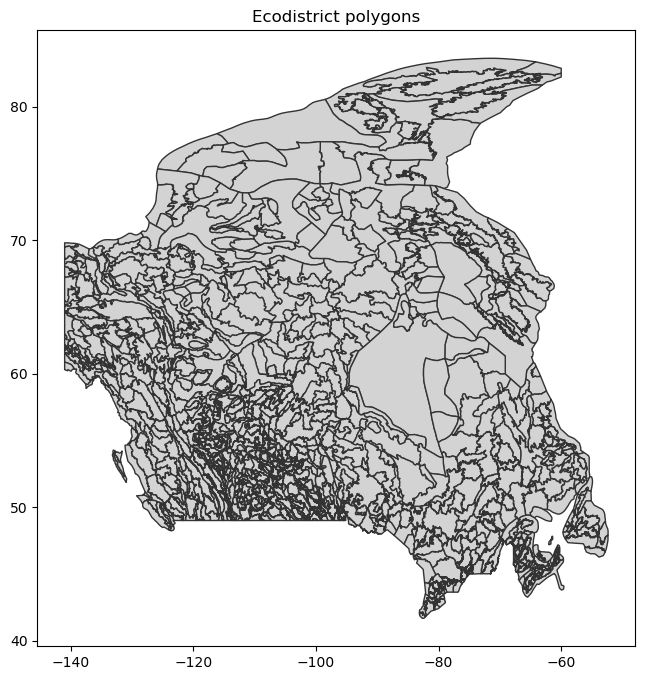

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the provinces first
dissolved_polygons.plot(ax=ax, edgecolor="0.2", color='lightgrey')
# gdf.plot(ax=ax, marker='o', color='red', markersize=5)

plt.title("Ecodistrict polygons")
plt.show()

In [46]:
dissolved_polygons.to_file("../data/external/slc_dissolved_ecodistrict/slc_dissolved_ecodistrict.shp")

In [43]:
ecodistrict = gpd.read_file("../data/external/slc_dissolved_ecodistrict")
ecodistrict = slc_polygons.to_crs('EPSG:4326')
ecodistrict

AREA  PERIMETER  POLY_ID  ECO_ID  \
0      1.376666   6.159230    14003      14   
1      1.580340   9.611541    14002      14   
2      0.932502   5.332157    14004      14   
3      2.408007  13.902721    14005      14   
4      3.511283  27.056163    14001      14   
...         ...        ...      ...     ...   
12348  0.011228   1.038751   572002     572   
12349  0.028866   0.843499   572004     572   
12350  0.019782   0.745984   572006     572   
12351  0.087583   1.234050   572005     572   
12352  0.040863   0.800462   572007     572   

                                                geometry  
0      POLYGON ((-73.74820 83.60566, -72.61377 83.626...  
1      POLYGON ((-70.91842 83.63315, -69.65201 83.612...  
2      POLYGON ((-75.75444 83.56109, -74.13673 83.597...  
3      POLYGON ((-77.61654 83.51138, -76.16966 83.550...  
4      POLYGON ((-67.62450 83.54608, -65.74776 83.467...  
...                                                  ...  
12348  POLYGON ((-82.62274 42.09282, -82.62270 42.093...  
12349  POLYGON ((-82.75051 42.03226, -82.74742 42.031...  
12350  POLYGON ((-82.86602 42.03530, -82.86598 42.033...  
12351  POLYGON ((-82.57620 41.88860, -82.57074 41.950...  
12352  POLYGON ((-82.71173 41.90714, -82.64130 41.897...  

[12353 rows x 5 columns]

In [62]:
import random

In [97]:
# Function to generate random points within a polygon
def generate_random_points(polygon, num_points):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if random_point.within(polygon):  # Check if point is within the polygon
            points.append(random_point)
    return points

# # Specify the number of random points you want per polygon
# num_points_per_polygon = 5  # Adjust as needed


# # Generate the random points
# slc_polygons['random_points'] = slc_polygons['geometry'].apply(lambda x: generate_random_points(x, num_points_per_polygon))

# # If you want to extract and save latitude and longitude
def extract_lat_lon(points):
    return [(point.x, point.y) for point in points]

# # Extract latitude and longitude
# slc_polygons['lat_lon'] = slc_polygons['random_points'].apply(extract_lat_lon)


In [98]:
eco_id = 572
farm_ecodistrict = dissolved_polygons.query(f"ECO_ID == {eco_id}")
farm_ecodistrict_geometry = farm_ecodistrict["geometry"].iloc[0]
type(farm_ecodistrict_geometry)

shapely.geometry.polygon.Polygon

In [99]:
farm_ecodistrict

ECO_ID                                           geometry      AREA  \
568     572  POLYGON ((-82.57620 41.88860, -82.57074 41.950...  0.031825   

     PERIMETER  
568   1.335354

In [100]:
min_x, min_y, max_x, max_y = farm_ecodistrict_geometry.bounds
print(min_x, min_y, max_x, max_y)

-83.15001777832535 41.67353655459526 -82.21088503725717 42.150007557059176


In [102]:
random_points = generate_random_points(farm_ecodistrict_geometry, 10)
# random_points
geo_series_points = gpd.GeoSeries(random_points)
print(geo_series_points)

0    POINT (-82.48585 41.68568)
1    POINT (-82.82712 42.01145)
2    POINT (-82.28125 41.82947)
3    POINT (-82.49747 41.80220)
4    POINT (-82.56403 41.83849)
5    POINT (-82.60266 41.75550)
6    POINT (-82.92900 41.94576)
7    POINT (-82.64636 41.86724)
8    POINT (-82.87381 41.84561)
9    POINT (-82.85285 41.97800)
dtype: geometry


In [103]:
extract_lat_lon(geo_series_points)

[(-82.48584690179675, 41.685681289071304),
 (-82.82711808758052, 42.0114457853692),
 (-82.28125120207335, 41.829465995421344),
 (-82.49746626387146, 41.802196462028334),
 (-82.56402794869797, 41.83848610258488),
 (-82.60266170444017, 41.755495140774386),
 (-82.9290032060646, 41.945756942074155),
 (-82.64636373094974, 41.86724048834937),
 (-82.87381239817465, 41.84560855160261),
 (-82.85285409211065, 41.978001831366484)]

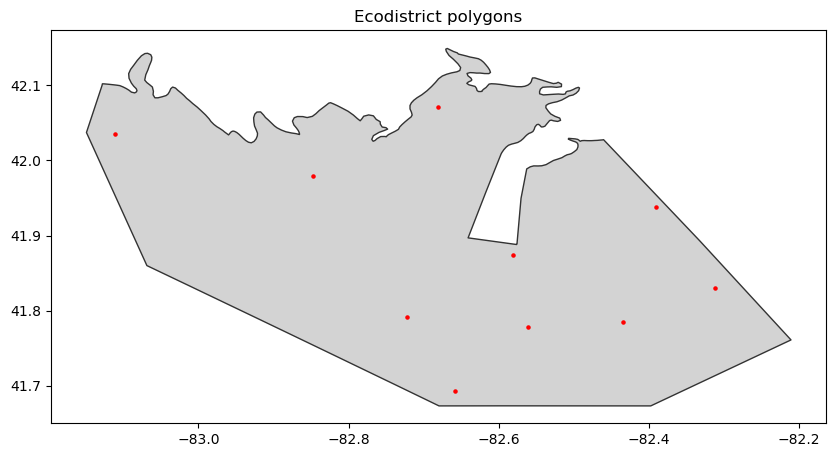

In [94]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the provinces first
dissolved_polygons.query("ECO_ID == 572").plot(ax=ax, edgecolor="0.2", color='lightgrey')
geo_series_points.plot(ax=ax, marker='o', color='red', markersize=5)

plt.title("Ecodistrict polygons")
plt.show()

In [105]:
dissolved_polygons[["ECO_ID", "geometry"]]

ECO_ID                                           geometry
0          1  POLYGON ((-81.82100 80.84613, -81.86701 80.842...
1          2  POLYGON ((-78.14311 79.33501, -78.24853 79.337...
2          3  POLYGON ((-91.08031 79.05304, -91.07503 79.030...
3          4  POLYGON ((-82.29263 74.51720, -82.27618 74.542...
4          5  POLYGON ((-74.21592 71.20401, -74.22913 71.201...
...      ...                                                ...
1022    9607  POLYGON ((-113.82061 57.83890, -113.81799 57.8...
1023    9608  POLYGON ((-111.66100 56.61017, -111.66929 56.6...
1024    9609  POLYGON ((-111.75039 55.09389, -111.73839 55.0...
1025    9687  POLYGON ((-111.95540 53.80763, -111.96202 53.8...
1026    9787  POLYGON ((-112.19831 51.02108, -112.20338 51.0...

[1027 rows x 2 columns]

In [107]:
gdf

farm_id country_name   latitude   longitude  \
0    7a2e6fcc-ab78-11eb-a4ad-0242ac130002       Canada  49.059192 -122.882005   
1    36322d78-b2ac-11eb-9edf-0242ac130002       Canada  49.036135 -122.713490   
2    dee27326-b2af-11eb-a871-0242ac130002       Canada  43.944641  -79.730420   
3    1e3b98f8-ca44-11eb-8062-0242ac130002       Canada  48.995126  -58.045602   
4    33851eae-dad5-11eb-9c2f-0242ac130002       Canada  46.636528  -71.042723   
..                                    ...          ...        ...         ...   
118  3531b218-e6c0-11ee-a6cc-0242ac150002       Canada  43.717398  -79.625701   
119  2a03cf4c-e9e6-11ee-8667-0242ac150002       Canada  49.199923 -119.762455   
120  4316e7b6-eb90-11ee-807f-0242ac150002       Canada  51.272857 -120.173324   
121  4316e7b6-eb90-11ee-807f-0242ac150002       Canada  51.272857 -120.173324   
122  956d77bc-ec64-11ee-aaa2-0242ac150002       Canada  49.080776 -122.052679   

                              location_id                type  \
0    605c6008-ab7e-11eb-8a94-0242ac130002  farm_site_boundary   
1    931eeb88-b2ad-11eb-b6ac-0242ac130002  farm_site_boundary   
2    607eb4a8-b2b0-11eb-b10e-0242ac130002  farm_site_boundary   
3    5f708a3c-ca5c-11eb-a595-0242ac130002  farm_site_boundary   
4    fcc4ed58-dad5-11eb-b818-0242ac130002  farm_site_boundary   
..                                    ...                 ...   
118  c2a9b4d8-e6c0-11ee-bb98-0242ac150002  farm_site_boundary   
119  ea56dbf4-e9e6-11ee-a60c-0242ac150002  farm_site_boundary   
120  55a9d620-eb92-11ee-99a2-0242ac150002  farm_site_boundary   
121  1525ee9e-eb93-11ee-871f-0242ac150002  farm_site_boundary   
122  74504bd2-ec68-11ee-aaa2-0242ac150002  farm_site_boundary   

     location_area_m2                               location_grid_points  \
0            211908.0  [{"lat": 49.05928816695972, "lng": -122.883487...   
1             21388.0  [{"lat": 49.0361106915654, "lng": -122.7183954...   
2            211695.0  [{"lat": 43.94351188354036, "lng": -79.7265726...   
3              1047.0  [{"lat": 48.994851525201184, "lng": -58.045751...   
4             52718.0  [{"lat": 46.63706792013167, "lng": -71.0435030...   
..                ...                                                ...   
118              24.0  [{"lat": 43.71732145136963, "lng": -79.6257741...   
119           28408.0  [{"lat": 49.19914065991467, "lng": -119.760416...   
120          540627.0  [{"lat": 51.265569531243116, "lng": -120.16681...   
121            1677.0  [{"lat": 51.27113899369368, "lng": -120.169428...   
122             263.0  [{"lat": 49.07700155651061, "lng": -122.053645...   

                                      polygon_geometry  \
0    POLYGON ((-122.88348775768395 49.0592881669597...   
1    POLYGON ((-122.71839542729994 49.0361106915654...   
2    POLYGON ((-79.72657263766844 43.94351188354036...   
3    POLYGON ((-58.04575132181069 48.99485152520118...   
4    POLYGON ((-71.04350309594241 46.63706792013167...   
..                                                 ...   
118  POLYGON ((-79.62577411476846 43.71732145136963...   
119  POLYGON ((-119.7604163211487 49.19914065991467...   
120  POLYGON ((-120.1668140838416 51.26556953124311...   
121  POLYGON ((-120.16942815232515 51.2711389936936...   
122  POLYGON ((-122.0536454314127 49.07700155651061...   

                  point_geometry  
0    POINT (-122.88200 49.05919)  
1    POINT (-122.71349 49.03613)  
2     POINT (-79.73042 43.94464)  
3     POINT (-58.04560 48.99513)  
4     POINT (-71.04272 46.63653)  
..                           ...  
118   POINT (-79.62570 43.71740)  
119  POINT (-119.76245 49.19992)  
120  POINT (-120.17332 51.27286)  
121  POINT (-120.17332 51.27286)  
122  POINT (-122.05268 49.08078)  

[123 rows x 10 columns]

In [106]:
farm_polygons = gpd.sjoin(gdf, 
                          dissolved_polygons[["ECO_ID", "geometry"]],
                          how='left', 
                          predicate='within'
                         ).drop(columns=['index_right'])
farm_polygons.head()

farm_id country_name   latitude   longitude  \
0  7a2e6fcc-ab78-11eb-a4ad-0242ac130002       Canada  49.059192 -122.882005   
1  36322d78-b2ac-11eb-9edf-0242ac130002       Canada  49.036135 -122.713490   
2  dee27326-b2af-11eb-a871-0242ac130002       Canada  43.944641  -79.730420   
3  1e3b98f8-ca44-11eb-8062-0242ac130002       Canada  48.995126  -58.045602   
4  33851eae-dad5-11eb-9c2f-0242ac130002       Canada  46.636528  -71.042723   

                            location_id                type  location_area_m2  \
0  605c6008-ab7e-11eb-8a94-0242ac130002  farm_site_boundary          211908.0   
1  931eeb88-b2ad-11eb-b6ac-0242ac130002  farm_site_boundary           21388.0   
2  607eb4a8-b2b0-11eb-b10e-0242ac130002  farm_site_boundary          211695.0   
3  5f708a3c-ca5c-11eb-a595-0242ac130002  farm_site_boundary            1047.0   
4  fcc4ed58-dad5-11eb-b818-0242ac130002  farm_site_boundary           52718.0   

                                location_grid_points  \
0  [{"lat": 49.05928816695972, "lng": -122.883487...   
1  [{"lat": 49.0361106915654, "lng": -122.7183954...   
2  [{"lat": 43.94351188354036, "lng": -79.7265726...   
3  [{"lat": 48.994851525201184, "lng": -58.045751...   
4  [{"lat": 46.63706792013167, "lng": -71.0435030...   

                                    polygon_geometry  \
0  POLYGON ((-122.88348775768395 49.0592881669597...   
1  POLYGON ((-122.71839542729994 49.0361106915654...   
2  POLYGON ((-79.72657263766844 43.94351188354036...   
3  POLYGON ((-58.04575132181069 48.99485152520118...   
4  POLYGON ((-71.04350309594241 46.63706792013167...   

                point_geometry  ECO_ID  
0  POINT (-122.88200 49.05919)     959  
1  POINT (-122.71349 49.03613)     959  
2   POINT (-79.73042 43.94464)     562  
3   POINT (-58.04560 48.99513)     458  
4   POINT (-71.04272 46.63653)     540

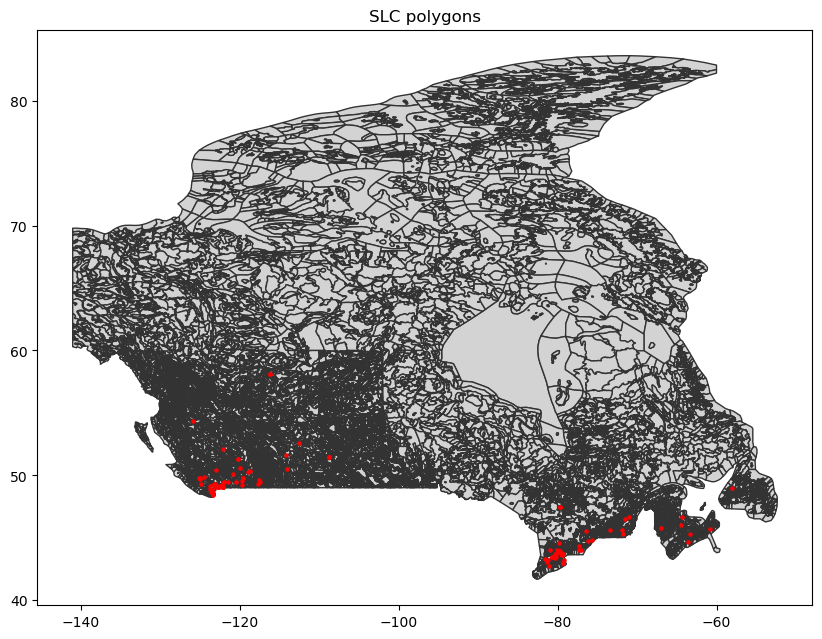

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the provinces first
slc_polygons.plot(ax=ax, edgecolor="0.2", color='lightgrey')
# ax.set_aspect('equal')
gdf.set_geometry('point_geometry', inplace=True)
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

plt.title("SLC polygons")
plt.show()

In [8]:
farm_polygons = gpd.sjoin(gdf, 
                          slc_polygons[["POLY_ID", "ECO_ID", "geometry"]],
                          how='left', 
                          predicate='within'
                         ).drop(columns=['index_right'])
farm_polygons.head()

farm_id country_name   latitude   longitude  \
0  7a2e6fcc-ab78-11eb-a4ad-0242ac130002       Canada  49.059192 -122.882005   
1  36322d78-b2ac-11eb-9edf-0242ac130002       Canada  49.036135 -122.713490   
2  dee27326-b2af-11eb-a871-0242ac130002       Canada  43.944641  -79.730420   
3  1e3b98f8-ca44-11eb-8062-0242ac130002       Canada  48.995126  -58.045602   
4  33851eae-dad5-11eb-9c2f-0242ac130002       Canada  46.636528  -71.042723   

                            location_id                type  location_area_m2  \
0  605c6008-ab7e-11eb-8a94-0242ac130002  farm_site_boundary          211908.0   
1  931eeb88-b2ad-11eb-b6ac-0242ac130002  farm_site_boundary           21388.0   
2  607eb4a8-b2b0-11eb-b10e-0242ac130002  farm_site_boundary          211695.0   
3  5f708a3c-ca5c-11eb-a595-0242ac130002  farm_site_boundary            1047.0   
4  fcc4ed58-dad5-11eb-b818-0242ac130002  farm_site_boundary           52718.0   

                                location_grid_points  \
0  [{"lat": 49.05928816695972, "lng": -122.883487...   
1  [{"lat": 49.0361106915654, "lng": -122.7183954...   
2  [{"lat": 43.94351188354036, "lng": -79.7265726...   
3  [{"lat": 48.994851525201184, "lng": -58.045751...   
4  [{"lat": 46.63706792013167, "lng": -71.0435030...   

                                    polygon_geometry  \
0  POLYGON ((-122.88348775768395 49.0592881669597...   
1  POLYGON ((-122.71839542729994 49.0361106915654...   
2  POLYGON ((-79.72657263766844 43.94351188354036...   
3  POLYGON ((-58.04575132181069 48.99485152520118...   
4  POLYGON ((-71.04350309594241 46.63706792013167...   

                point_geometry  POLY_ID  ECO_ID  
0  POINT (-122.88200 49.05919)   959010     959  
1  POINT (-122.71349 49.03613)   959010     959  
2   POINT (-79.73042 43.94464)   562002     562  
3   POINT (-58.04560 48.99513)   458007     458  
4   POINT (-71.04272 46.63653)   540095     540

In [105]:
climate["SoilType"].unique()

array(['Brown Chernozem', 'Black/Gray Chernozem', 'Eastern Canada',
       'Dark Brown Chernozem'], dtype=object)

In [83]:
climate["Province"].unique()

array(['Manitoba', 'Saskatchewan', 'Ontario', 'Quebec',
       'Newfoundland and Labrador', 'New Brunswick', 'Nova Scotia',
       'Prince Edward Island', 'Alberta', 'British Columbia'],
      dtype=object)

In [10]:
holos_ecodistrict = climate["Ecodistrict"].unique().tolist()
farms_ecodistrict = farm_polygons["ECO_ID"].unique().tolist()

all_elements_contained = set(farms_ecodistrict).issubset(holos_ecodistrict)
print(all_elements_contained)

True


In [11]:
provinces = gpd.read_file("../data/external/provinces_shp")
provinces = provinces.to_crs("EPSG:4326") 
provinces.head()

PRUID                                             PRNAME  \
0    10  Newfoundland and Labrador / Terre-Neuve-et-Lab...   
1    11       Prince Edward Island / Île-du-Prince-Édouard   
2    12                      Nova Scotia / Nouvelle-Écosse   
3    13                  New Brunswick / Nouveau-Brunswick   
4    24                                    Quebec / Québec   

                     PRENAME                  PRFNAME PREABBR   PRFABBR  \
0  Newfoundland and Labrador  Terre-Neuve-et-Labrador    N.L.  T.-N.-L.   
1       Prince Edward Island    Île-du-Prince-Édouard  P.E.I.  Î.-P.-É.   
2                Nova Scotia          Nouvelle-Écosse    N.S.     N.-É.   
3              New Brunswick        Nouveau-Brunswick    N.B.     N.-B.   
4                     Quebec                   Québec    Que.        Qc   

                                            geometry  
0  MULTIPOLYGON (((-57.40256 54.14965, -57.38429 ...  
1  MULTIPOLYGON (((-61.98300 46.45775, -61.98136 ...  
2  MULTIPOLYGON (((-61.90233 45.87878, -61.90057 ...  
3  MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ...  
4  MULTIPOLYGON (((-58.64703 51.20816, -58.63991 ...

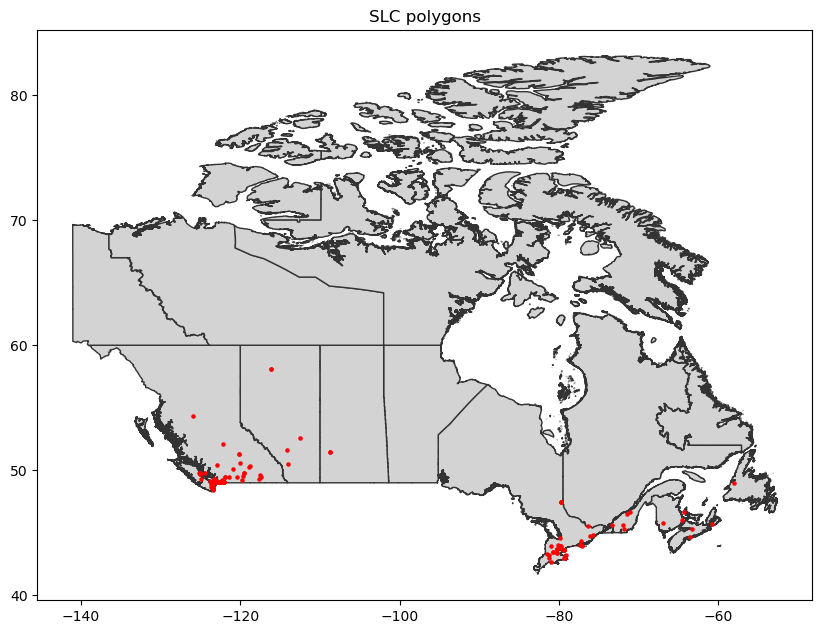

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the provinces first
provinces.plot(ax=ax, edgecolor="0.2", color='lightgrey')
# ax.set_aspect('equal')
gdf.set_geometry('point_geometry', inplace=True)
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

plt.title("SLC polygons")
plt.show()

In [13]:
# Add province column 
farm_polygons = farm_polygons.to_crs("EPSG:4326") 
farm_polygons.set_geometry('point_geometry', inplace=True)
farm_eco_prov = gpd.sjoin(farm_polygons,
                          provinces[["PRENAME", "geometry"]], 
                          how='left', 
                          predicate='intersects'
                          ).drop(columns=['index_right'])

In [14]:
farm_eco_prov.head()

farm_id country_name   latitude   longitude  \
0  7a2e6fcc-ab78-11eb-a4ad-0242ac130002       Canada  49.059192 -122.882005   
1  36322d78-b2ac-11eb-9edf-0242ac130002       Canada  49.036135 -122.713490   
2  dee27326-b2af-11eb-a871-0242ac130002       Canada  43.944641  -79.730420   
3  1e3b98f8-ca44-11eb-8062-0242ac130002       Canada  48.995126  -58.045602   
4  33851eae-dad5-11eb-9c2f-0242ac130002       Canada  46.636528  -71.042723   

                            location_id                type  location_area_m2  \
0  605c6008-ab7e-11eb-8a94-0242ac130002  farm_site_boundary          211908.0   
1  931eeb88-b2ad-11eb-b6ac-0242ac130002  farm_site_boundary           21388.0   
2  607eb4a8-b2b0-11eb-b10e-0242ac130002  farm_site_boundary          211695.0   
3  5f708a3c-ca5c-11eb-a595-0242ac130002  farm_site_boundary            1047.0   
4  fcc4ed58-dad5-11eb-b818-0242ac130002  farm_site_boundary           52718.0   

                                location_grid_points  \
0  [{"lat": 49.05928816695972, "lng": -122.883487...   
1  [{"lat": 49.0361106915654, "lng": -122.7183954...   
2  [{"lat": 43.94351188354036, "lng": -79.7265726...   
3  [{"lat": 48.994851525201184, "lng": -58.045751...   
4  [{"lat": 46.63706792013167, "lng": -71.0435030...   

                                    polygon_geometry  \
0  POLYGON ((-122.88348775768395 49.0592881669597...   
1  POLYGON ((-122.71839542729994 49.0361106915654...   
2  POLYGON ((-79.72657263766844 43.94351188354036...   
3  POLYGON ((-58.04575132181069 48.99485152520118...   
4  POLYGON ((-71.04350309594241 46.63706792013167...   

                point_geometry  POLY_ID  ECO_ID                    PRENAME  
0  POINT (-122.88200 49.05919)   959010     959           British Columbia  
1  POINT (-122.71349 49.03613)   959010     959           British Columbia  
2   POINT (-79.73042 43.94464)   562002     562                    Ontario  
3   POINT (-58.04560 48.99513)   458007     458  Newfoundland and Labrador  
4   POINT (-71.04272 46.63653)   540095     540                     Quebec

In [15]:
farm_prov = farm_eco_prov["PRENAME"].unique().tolist()
climate_prov = climate["Province"].unique().tolist()

all_province_contained = set(climate_prov).issubset(farm_prov)
print(all_elements_contained)

True


In [16]:
farm_ecoid_climate = pd.merge(farm_eco_prov, climate,  
                              how='left', 
                              left_on=['ECO_ID','PRENAME'], 
                              right_on = ['Ecodistrict','Province'])


In [17]:
farm_ecoid_climate.head()

farm_id country_name   latitude   longitude  \
0  7a2e6fcc-ab78-11eb-a4ad-0242ac130002       Canada  49.059192 -122.882005   
1  36322d78-b2ac-11eb-9edf-0242ac130002       Canada  49.036135 -122.713490   
2  dee27326-b2af-11eb-a871-0242ac130002       Canada  43.944641  -79.730420   
3  1e3b98f8-ca44-11eb-8062-0242ac130002       Canada  48.995126  -58.045602   
4  33851eae-dad5-11eb-9c2f-0242ac130002       Canada  46.636528  -71.042723   

                            location_id                type  location_area_m2  \
0  605c6008-ab7e-11eb-8a94-0242ac130002  farm_site_boundary          211908.0   
1  931eeb88-b2ad-11eb-b6ac-0242ac130002  farm_site_boundary           21388.0   
2  607eb4a8-b2b0-11eb-b10e-0242ac130002  farm_site_boundary          211695.0   
3  5f708a3c-ca5c-11eb-a595-0242ac130002  farm_site_boundary            1047.0   
4  fcc4ed58-dad5-11eb-b818-0242ac130002  farm_site_boundary           52718.0   

                                location_grid_points  \
0  [{"lat": 49.05928816695972, "lng": -122.883487...   
1  [{"lat": 49.0361106915654, "lng": -122.7183954...   
2  [{"lat": 43.94351188354036, "lng": -79.7265726...   
3  [{"lat": 48.994851525201184, "lng": -58.045751...   
4  [{"lat": 46.63706792013167, "lng": -71.0435030...   

                                    polygon_geometry  \
0  POLYGON ((-122.88348775768395 49.0592881669597...   
1  POLYGON ((-122.71839542729994 49.0361106915654...   
2  POLYGON ((-79.72657263766844 43.94351188354036...   
3  POLYGON ((-58.04575132181069 48.99485152520118...   
4  POLYGON ((-71.04350309594241 46.63706792013167...   

                point_geometry  ...  ECO_ID                    PRENAME  \
0  POINT (-122.88200 49.05919)  ...     959           British Columbia   
1  POINT (-122.71349 49.03613)  ...     959           British Columbia   
2   POINT (-79.73042 43.94464)  ...     562                    Ontario   
3   POINT (-58.04560 48.99513)  ...     458  Newfoundland and Labrador   
4   POINT (-71.04272 46.63653)  ...     540                     Quebec   

  Ecodistrict             Ecozone                   Province PMayToOct  \
0         959    Pacific Maritime           British Columbia       480   
1         959    Pacific Maritime           British Columbia       480   
2         562    Mixedwood Plains                    Ontario       461   
3         458  Boreal Shield East  Newfoundland and Labrador       621   
4         540    Mixedwood Plains                     Quebec       652   

   PEMayToOct  Ftopo         SoilType SoilTexture  
0         506   6.53  Brown Chernozem      Medium  
1         506   6.53  Brown Chernozem      Medium  
2         586   2.03   Eastern Canada      Medium  
3         407   0.00   Eastern Canada      Medium  
4         556  11.71   Eastern Canada      Coarse  

[5 rows x 21 columns]

In [18]:
farm_ecoid_climate.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   farm_id               123 non-null    object  
 1   country_name          123 non-null    object  
 2   latitude              123 non-null    float64 
 3   longitude             123 non-null    float64 
 4   location_id           123 non-null    object  
 5   type                  123 non-null    object  
 6   location_area_m2      123 non-null    float64 
 7   location_grid_points  123 non-null    object  
 8   polygon_geometry      123 non-null    object  
 9   point_geometry        123 non-null    geometry
 10  POLY_ID               123 non-null    int64   
 11  ECO_ID                123 non-null    int64   
 12  PRENAME               123 non-null    object  
 13  Ecodistrict           123 non-null    int64   
 14  Ecozone               123 non-null    object  
 15

In [20]:
# Link polygons's climate data
polygon_climate = pd.read_csv("../data/raw/Holos/climateNorms_by_poly_1980_2010.csv")
polygon_climate.head()

SLC  month       Tavg       PREC         PET
0  1001009      1  -4.435724  36.944946    0.000872
1  1001009      2  -1.590094  19.551792    0.145423
2  1001009      3   2.747708  20.984373   12.787213
3  1001009      4   7.378428  17.094301   58.751700
4  1001009      5  12.121925  27.899176  106.848321

In [22]:
pl_1001009 = polygon_climate.query("SLC == 1001009")
pl_1001009

SLC  month       Tavg       PREC         PET
0   1001009      1  -4.435724  36.944946    0.000872
1   1001009      2  -1.590094  19.551792    0.145423
2   1001009      3   2.747708  20.984373   12.787213
3   1001009      4   7.378428  17.094301   58.751700
4   1001009      5  12.121925  27.899176  106.848321
5   1001009      6  16.009086  34.396989  128.145210
6   1001009      7  19.401106  27.869427  151.593087
7   1001009      8  19.009205  23.902975  132.828566
8   1001009      9  14.085603  26.408781   74.659855
9   1001009     10   7.280513  31.575018   14.059718
10  1001009     11   0.229496  45.319749    0.027281
11  1001009     12  -4.804596  43.087670    0.000000

In [27]:
filtered_pc = polygon_climate.query("5<= month <= 10")
# filtered_pc.describe()

SLC         month          Tavg          PREC           PET
count  2.245800e+04  22458.000000  22458.000000  22458.000000  22458.000000
mean   7.091457e+05      7.500000     13.969134     62.907452     89.009041
std    7.395539e+05      1.707863      4.824506     26.266514     41.569430
min    2.440070e+05      5.000000      0.000000      0.000000      0.000000
25%    5.130120e+05      6.000000     10.671465     40.453367     59.101862
50%    5.990010e+05      7.500000     14.840184     63.400732    102.501236
75%    7.800050e+05      9.000000     17.906792     83.541532    122.045830
max    9.787004e+06     10.000000     24.350927    234.475000    169.746832

In [29]:
sum_prec_by_polyid = filtered_pc.groupby('SLC').agg({
    'PREC': 'sum',
    'PET': 'sum'
}).reset_index()
sum_prec_by_polyid.head()

SLC        PREC         PET
0  244007  309.691331  462.468366
1  244052  219.848583  455.783519
2  244058  221.149380  444.250239
3  244061  210.919931  428.387693
4  244066  250.853528  414.068376

In [30]:
sum_prec_by_polyid.query("SLC == 1001009")

SLC        PREC         PET
3565  1001009  172.052366  608.134756

In [31]:
sum_prec_by_polyid["SLC"]

0        244007
1        244052
2        244058
3        244061
4        244066
         ...   
3738    9687011
3739    9787001
3740    9787002
3741    9787003
3742    9787004
Name: SLC, Length: 3743, dtype: int64

In [32]:
farm_ecoid_polyid_climate = pd.merge(farm_ecoid_climate, sum_prec_by_polyid,
                                     how='left',
                                     left_on=['POLY_ID'],
                                     right_on = ['SLC'])
farm_ecoid_polyid_climate

farm_id country_name   latitude   longitude  \
0    7a2e6fcc-ab78-11eb-a4ad-0242ac130002       Canada  49.059192 -122.882005   
1    36322d78-b2ac-11eb-9edf-0242ac130002       Canada  49.036135 -122.713490   
2    dee27326-b2af-11eb-a871-0242ac130002       Canada  43.944641  -79.730420   
3    1e3b98f8-ca44-11eb-8062-0242ac130002       Canada  48.995126  -58.045602   
4    33851eae-dad5-11eb-9c2f-0242ac130002       Canada  46.636528  -71.042723   
..                                    ...          ...        ...         ...   
118  3531b218-e6c0-11ee-a6cc-0242ac150002       Canada  43.717398  -79.625701   
119  2a03cf4c-e9e6-11ee-8667-0242ac150002       Canada  49.199923 -119.762455   
120  4316e7b6-eb90-11ee-807f-0242ac150002       Canada  51.272857 -120.173324   
121  4316e7b6-eb90-11ee-807f-0242ac150002       Canada  51.272857 -120.173324   
122  956d77bc-ec64-11ee-aaa2-0242ac150002       Canada  49.080776 -122.052679   

                              location_id                type  \
0    605c6008-ab7e-11eb-8a94-0242ac130002  farm_site_boundary   
1    931eeb88-b2ad-11eb-b6ac-0242ac130002  farm_site_boundary   
2    607eb4a8-b2b0-11eb-b10e-0242ac130002  farm_site_boundary   
3    5f708a3c-ca5c-11eb-a595-0242ac130002  farm_site_boundary   
4    fcc4ed58-dad5-11eb-b818-0242ac130002  farm_site_boundary   
..                                    ...                 ...   
118  c2a9b4d8-e6c0-11ee-bb98-0242ac150002  farm_site_boundary   
119  ea56dbf4-e9e6-11ee-a60c-0242ac150002  farm_site_boundary   
120  55a9d620-eb92-11ee-99a2-0242ac150002  farm_site_boundary   
121  1525ee9e-eb93-11ee-871f-0242ac150002  farm_site_boundary   
122  74504bd2-ec68-11ee-aaa2-0242ac150002  farm_site_boundary   

     location_area_m2                               location_grid_points  \
0            211908.0  [{"lat": 49.05928816695972, "lng": -122.883487...   
1             21388.0  [{"lat": 49.0361106915654, "lng": -122.7183954...   
2            211695.0  [{"lat": 43.94351188354036, "lng": -79.7265726...   
3              1047.0  [{"lat": 48.994851525201184, "lng": -58.045751...   
4             52718.0  [{"lat": 46.63706792013167, "lng": -71.0435030...   
..                ...                                                ...   
118              24.0  [{"lat": 43.71732145136963, "lng": -79.6257741...   
119           28408.0  [{"lat": 49.19914065991467, "lng": -119.760416...   
120          540627.0  [{"lat": 51.265569531243116, "lng": -120.16681...   
121            1677.0  [{"lat": 51.27113899369368, "lng": -120.169428...   
122             263.0  [{"lat": 49.07700155651061, "lng": -122.053645...   

                                      polygon_geometry  \
0    POLYGON ((-122.88348775768395 49.0592881669597...   
1    POLYGON ((-122.71839542729994 49.0361106915654...   
2    POLYGON ((-79.72657263766844 43.94351188354036...   
3    POLYGON ((-58.04575132181069 48.99485152520118...   
4    POLYGON ((-71.04350309594241 46.63706792013167...   
..                                                 ...   
118  POLYGON ((-79.62577411476846 43.71732145136963...   
119  POLYGON ((-119.7604163211487 49.19914065991467...   
120  POLYGON ((-120.1668140838416 51.26556953124311...   
121  POLYGON ((-120.16942815232515 51.2711389936936...   
122  POLYGON ((-122.0536454314127 49.07700155651061...   

                  point_geometry  ...             Ecozone  \
0    POINT (-122.88200 49.05919)  ...    Pacific Maritime   
1    POINT (-122.71349 49.03613)  ...    Pacific Maritime   
2     POINT (-79.73042 43.94464)  ...    Mixedwood Plains   
3     POINT (-58.04560 48.99513)  ...  Boreal Shield East   
4     POINT (-71.04272 46.63653)  ...    Mixedwood Plains   
..                           ...  ...                 ...   
118   POINT (-79.62570 43.71740)  ...    Mixedwood Plains   
119  POINT (-119.76245 49.19992)  ...  Montane Cordillera   
120  POINT (-120.17332 51.27286)  ...  Montane Cordillera   
121  POINT (-120.17332 51.27286)  ...  Montane Cordillera   

In [39]:
farm_ecoid_polyid_climate.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   farm_id               123 non-null    object  
 1   country_name          123 non-null    object  
 2   latitude              123 non-null    float64 
 3   longitude             123 non-null    float64 
 4   location_id           123 non-null    object  
 5   type                  123 non-null    object  
 6   location_area_m2      123 non-null    float64 
 7   location_grid_points  123 non-null    object  
 8   polygon_geometry      123 non-null    object  
 9   point_geometry        123 non-null    geometry
 10  POLY_ID               123 non-null    int64   
 11  ECO_ID                123 non-null    int64   
 12  PRENAME               123 non-null    object  
 13  Ecodistrict           123 non-null    int64   
 14  Ecozone               123 non-null    object  
 15

In [42]:
na_rows = farm_ecoid_polyid_climate[farm_ecoid_polyid_climate.isna().any(axis=1)]
na_rows["POLY_ID"]

80    951017
92    951017
Name: POLY_ID, dtype: int64

In [43]:
polygon_climate.query("SLC == 951017")

Empty DataFrame
Columns: [SLC, month, Tavg, PREC, PET]
Index: []

In [33]:
farm_ecoid_polyid_climate["P_diff"] = farm_ecoid_polyid_climate["PMayToOct"] - farm_ecoid_polyid_climate["PREC"]
farm_ecoid_polyid_climate["PE_diff"] = farm_ecoid_polyid_climate["PEMayToOct"] - farm_ecoid_polyid_climate["PET"]

In [38]:
farm_ecoid_polyid_climate[["PMayToOct", "PREC", "P_diff", "PEMayToOct", "PET", "PE_diff"]].describe()

PMayToOct        PREC      P_diff  PEMayToOct         PET     PE_diff
count  123.000000  121.000000  121.000000  123.000000  121.000000  121.000000
mean   424.707317  397.474164   27.757241  531.349593  520.198923   12.941573
std    119.307066  115.156352   62.365400   69.717578   61.840801   42.400336
min    159.000000  163.521183 -154.606774  404.000000  383.361178  -84.050174
25%    318.000000  282.706210   11.139758  506.000000  463.185872  -16.734712
50%    480.000000  429.802803   44.731613  529.000000  522.734712   12.510851
75%    490.000000  460.786452   68.508387  583.500000  572.312346   39.459944
max    665.000000  637.060645  179.138790  683.000000  660.811751  152.669213

In [47]:
farm_ecoid_polyid_climate.query("Province == 'British Columbia'")

farm_id country_name   latitude   longitude  \
0    7a2e6fcc-ab78-11eb-a4ad-0242ac130002       Canada  49.059192 -122.882005   
1    36322d78-b2ac-11eb-9edf-0242ac130002       Canada  49.036135 -122.713490   
5    742f9fee-e1d6-11eb-9c8c-0242ac130002       Canada  48.670856 -123.538603   
6    c6cd4bda-e4e1-11eb-ab2c-0242ac130002       Canada  49.636176 -117.552104   
7    a238c0d0-f26d-11eb-9950-0242ac140002       Canada  49.674478 -125.030860   
..                                    ...          ...        ...         ...   
116  45a878dc-cd1d-11ee-a3f1-0242ac150002       Canada  49.132540 -123.756250   
119  2a03cf4c-e9e6-11ee-8667-0242ac150002       Canada  49.199923 -119.762455   
120  4316e7b6-eb90-11ee-807f-0242ac150002       Canada  51.272857 -120.173324   
121  4316e7b6-eb90-11ee-807f-0242ac150002       Canada  51.272857 -120.173324   
122  956d77bc-ec64-11ee-aaa2-0242ac150002       Canada  49.080776 -122.052679   

                              location_id                type  \
0    605c6008-ab7e-11eb-8a94-0242ac130002  farm_site_boundary   
1    931eeb88-b2ad-11eb-b6ac-0242ac130002  farm_site_boundary   
5    a0ceeb12-e1d7-11eb-aa9b-0242ac130002  farm_site_boundary   
6    a1b6e5e0-e4e6-11eb-9249-0242ac130002  farm_site_boundary   
7    afb18e2c-f272-11eb-9997-0242ac140002  farm_site_boundary   
..                                    ...                 ...   
116  276bc5ae-d8df-11ee-b5ed-0242ac150002  farm_site_boundary   
119  ea56dbf4-e9e6-11ee-a60c-0242ac150002  farm_site_boundary   
120  55a9d620-eb92-11ee-99a2-0242ac150002  farm_site_boundary   
121  1525ee9e-eb93-11ee-871f-0242ac150002  farm_site_boundary   
122  74504bd2-ec68-11ee-aaa2-0242ac150002  farm_site_boundary   

     location_area_m2                               location_grid_points  \
0            211908.0  [{"lat": 49.05928816695972, "lng": -122.883487...   
1             21388.0  [{"lat": 49.0361106915654, "lng": -122.7183954...   
5             12256.0  [{"lat": 48.670913997111604, "lng": -123.53951...   
6             22560.0  [{"lat": 49.63557408952363, "lng": -117.553154...   
7              8415.0  [{"lat": 49.673345599316406, "lng": -125.03268...   
..                ...                                                ...   
116           79634.0  [{"lat": 49.13032656100895, "lng": -123.761933...   
119           28408.0  [{"lat": 49.19914065991467, "lng": -119.760416...   
120          540627.0  [{"lat": 51.265569531243116, "lng": -120.16681...   
121            1677.0  [{"lat": 51.27113899369368, "lng": -120.169428...   
122             263.0  [{"lat": 49.07700155651061, "lng": -122.053645...   

                                      polygon_geometry  \
0    POLYGON ((-122.88348775768395 49.0592881669597...   
1    POLYGON ((-122.71839542729994 49.0361106915654...   
5    POLYGON ((-123.53951675636091 48.6709139971116...   
6    POLYGON ((-117.55315457412514 49.6355740895236...   
7    POLYGON ((-125.03268688440619 49.6733455993164...   
..                                                 ...   
116  POLYGON ((-123.76193317279174 49.1303265610089...   
119  POLYGON ((-119.7604163211487 49.19914065991467...   
120  POLYGON ((-120.1668140838416 51.26556953124311...   
121  POLYGON ((-120.16942815232515 51.2711389936936...   
122  POLYGON ((-122.0536454314127 49.07700155651061...   

                  point_geometry  ...  PMayToOct  PEMayToOct  Ftopo  \
0    POINT (-122.88200 49.05919)  ...        480         506   6.53   
1    POINT (-122.71349 49.03613)  ...        480         506   6.53   
5    POINT (-123.53860 48.67086)  ...        318         428   4.68   
6    POINT (-117.55210 49.63618)  ...        321         554  16.82   
7    POINT (-125.03086 49.67448)  ...        318         428   4.68   
..                           ...  ...        ...         ...    ...   
116  POINT (-123.75625 49.13254)  ...        387         405  11.01   
119  POINT (-119.76245 49.19992)  ...        222         683   5.82   
120  POINT (-120.17332 51.27286

In [49]:
p = 159
pe = 678
f_topo = 7.57

In [75]:
import math
ef_ct_1 = math.exp(0.00558*p - 7.7) * 100
ef_ct_2 = math.exp(0.00558*pe - 7.7) * 100

In [76]:
ef_ct_1

0.1099631670775916

In [77]:
ef_ct_2

1.9905484145844587

In [78]:
ef_ct_2  * f_topo / 100 + ef_ct_1 * (1 - f_topo/100)

0.25232347031386143

In [59]:
ef_ct_1  * 50 / 100 + ef_ct_2 * (1 - 50/100)

1.0502557908310253

In [81]:
farm_ecoid_polyid_climate["Province"].unique()

array(['British Columbia', 'Ontario', 'Newfoundland and Labrador',
       'Quebec', 'Alberta', 'New Brunswick', 'Nova Scotia',
       'Saskatchewan', 'Prince Edward Island'], dtype=object)

In [82]:
climate["Province"].unique()

array(['Manitoba', 'Saskatchewan', 'Ontario', 'Quebec',
       'Newfoundland and Labrador', 'New Brunswick', 'Nova Scotia',
       'Prince Edward Island', 'Alberta', 'British Columbia'],
      dtype=object)

In [84]:
farm_ecoid_polyid_climate.query("Province == 'Ontario'")

farm_id country_name   latitude  longitude  \
2    dee27326-b2af-11eb-a871-0242ac130002       Canada  43.944641 -79.730420   
20   b4dc8a4a-5899-11ec-a805-0242ac150004       Canada  43.211569 -81.243985   
23   7c1fe092-70ab-11ec-bce9-0242ac150004       Canada  43.650131 -79.376157   
27   123d404a-8184-11ec-b625-0242ac150004       Canada  44.591560 -79.848285   
35   25182038-a496-11ec-b6c6-0242ac150004       Canada  42.971893 -79.267689   
36   8ec4938c-a495-11ec-84ae-0242ac150004       Canada  42.983490 -79.377840   
37   409ffbd2-a5ef-11ec-829d-0242ac150004       Canada  43.290989 -81.520383   
38   4b39dbe8-a71c-11ec-8cf0-0242ac150004       Canada  44.338295 -77.269479   
39   8dbcf280-9e24-11ec-ba30-0242ac150004       Canada  43.679254 -80.252299   
40   2fe062c0-a9fd-11ec-bf05-0242ac150004       Canada  47.458270 -79.717574   
41   2fe062c0-a9fd-11ec-bf05-0242ac150004       Canada  47.458270 -79.717574   
42   2fe062c0-a9fd-11ec-bf05-0242ac150004       Canada  47.458270 -79.717574   
44   f68f93a6-bcb2-11ec-ad5e-0242ac150004       Canada  43.986993 -77.065455   
49   e31aed0c-0825-11ed-9622-0242ac150004       Canada  43.426046 -80.205401   
50   ae91476c-0c75-11ed-9c22-0242ac150004       Canada  43.645749 -79.393083   
51   ae91476c-0c75-11ed-9c22-0242ac150004       Canada  43.645749 -79.393083   
53   3b35a35e-1980-11ed-a450-0242ac150004       Canada  44.762419 -76.119287   
55   44136140-305b-11ed-8274-0242ac150004       Canada  43.236870 -79.162960   
56   c4b6a76c-32cc-11ed-a0f1-0242ac150004       Canada  43.932440 -79.881271   
58   bd45d91e-5175-11ec-b2c1-0242ac150004       Canada  44.844039 -75.698165   
67   bc558b8a-87ca-11ed-abc6-0242ac150004       Canada  43.005326 -81.293410   
68   69b2d170-7f89-11ec-aeeb-0242ac150004       Canada  44.026869 -77.346119   
69   1b602274-9046-11ed-9c67-0242ac150004       Canada  43.661779 -79.369708   
73   9e8d527a-9b40-11ed-8b88-0242ac150004       Canada  43.968974 -80.980304   
86   23acb6d6-04a4-11ee-b58e-0242ac150004       Canada  43.445081 -80.706476   
87   23acb6d6-04a4-11ee-b58e-0242ac150004       Canada  43.445081 -80.706476   
93   8dbcf280-9e24-11ec-ba30-0242ac150004       Canada  43.679254 -80.252299   
108  2cc6f0f0-a108-11ee-8d16-0242ac150002       Canada  43.372044 -80.300404   
109  728ccbb0-b3c7-11ee-90f1-0242ac150002       Canada  42.700845 -81.025508   
115  2c09a474-d677-11ee-8fea-0242ac150002       Canada  43.686363 -80.263703   
117  0c4debae-da73-11ee-8409-0242ac150002       Canada  44.027060 -80.089900   
118  3531b218-e6c0-11ee-a6cc-0242ac150002       Canada  43.717398 -79.625701   

                              location_id                type  \
2    607eb4a8-b2b0-11eb-b10e-0242ac130002  farm_site_boundary   
20   b5a77364-589d-11ec-b276-0242ac150004  farm_site_boundary   
23   35a2a680-70ac-11ec-afc8-0242ac150004  farm_site_boundary   
27   8ba8f9b2-8187-11ec-a102-0242ac150004  farm_site_boundary   
35   70fb8994-a49c-11ec-8197-0242ac150004  farm_site_boundary   
36   9a3016a2-a49e-11ec-b64f-0242ac150004  farm_site_boundary   
37   1820a71c-a5f2-11ec-829d-0242ac150004  farm_site_boundary   
38   3ad9edb4-a71d-11ec-8690-0242ac150004  farm_site_boundary   
39   c07abc16-a9e6-11ec-9ee8-0242ac150004  farm_site_boundary   
40   10481054-aa00-11ec-baf8-0242ac150004  farm_site_boundary   
41   452ca476-aa03-11ec-aed8-0242ac150004  farm_site_boundary   
42   8f334098-aa03-11ec-8f19-0242ac150004  farm_site_boundary   
44   ffba0564-bcb3-11ec-ad5e-0242ac150004  farm_site_boundary   
49   fdd2bbf0-0827-11ed-9622-0242ac150004  farm_site_boundary   
50   5f71e68c-0c7a-11ed-b56a-0242ac150004  farm_site_boundary   
51   5df64cd8-0c81-11ed-b3ff-0242ac150004  farm_site_boundary   
53   a4ebc5ba-1a81-11ed-846e-0242ac150004  farm_site_boundary   
55   c31812cc-3085-11ed-a294-0242ac150004  farm_site_boundary   
56   6f622cea-32cd-11ed-825c-0242ac150004  farm_site_boundary   
58   e35402f4-cc24-11ed-a62a-0242ac150004  farm_site_boundary   
67   2a350e68-87cc-11ed-abc6

In [92]:
farm_ecoid_polyid_climate[["PMayToOct", "Ftopo", "PEMayToOct"]].describe()

PMayToOct       Ftopo  PEMayToOct
count  123.000000  123.000000  123.000000
mean   424.707317    7.721463  531.349593
std    119.307066    5.881614   69.717578
min    159.000000    0.000000  404.000000
25%    318.000000    4.680000  506.000000
50%    480.000000    6.530000  529.000000
75%    490.000000    9.155000  583.500000
max    665.000000   33.560000  683.000000

In [93]:
polygon_climate.head()

SLC  month       Tavg       PREC         PET
0  1001009      1  -4.435724  36.944946    0.000872
1  1001009      2  -1.590094  19.551792    0.145423
2  1001009      3   2.747708  20.984373   12.787213
3  1001009      4   7.378428  17.094301   58.751700
4  1001009      5  12.121925  27.899176  106.848321

In [97]:
poly1004023 = sum_prec_by_polyid.query("SLC == 1004023")

In [98]:
poly1004023

SLC        PREC         PET
3583  1004023  313.606774  592.274522

In [100]:
polygon_climate

SLC  month       Tavg       PREC         PET
0      1001009      1  -4.435724  36.944946    0.000872
1      1001009      2  -1.590094  19.551792    0.145423
2      1001009      3   2.747708  20.984373   12.787213
3      1001009      4   7.378428  17.094301   58.751700
4      1001009      5  12.121925  27.899176  106.848321
...        ...    ...        ...        ...         ...
44911   992005      8  16.937637  28.405230  126.498266
44912   992005      9  11.580262  34.170442   66.449092
44913   992005     10   4.996441  33.238318   15.766264
44914   992005     11  -2.040643  52.727777    0.045651
44915   992005     12  -7.459701  48.023963    0.006708

[44916 rows x 5 columns]

In [102]:
slc_polygons.query("POLY_ID == 1004023")

AREA  PERIMETER  POLY_ID  ECO_ID  \
7924  0.023754   1.513851  1004023    1004   

                                               geometry  
7924  POLYGON ((-120.10112 51.64078, -120.09315 51.6...

In [103]:
climate 

Ecodistrict             Ecozone          Province  PMayToOct  PEMayToOct  \
0            358  Boreal Shield West          Manitoba        348         453   
1            358  Boreal Shield West      Saskatchewan        348         453   
2            371  Boreal Shield West          Manitoba        376         581   
3            371  Boreal Shield West           Ontario        376         581   
4            375  Boreal Shield West          Manitoba        411         579   
..           ...                 ...               ...        ...         ...   
464         1017  Montane Cordillera           Alberta        329         588   
465         1017  Montane Cordillera  British Columbia        321         554   
466         1018  Montane Cordillera           Alberta        326         574   
467         1019  Montane Cordillera           Alberta        335         581   
468         1019  Montane Cordillera  British Columbia        335         581   

     Ftopo              SoilType SoilTexture  
0     0.00       Brown Chernozem      Coarse  
1     0.00       Brown Chernozem      Coarse  
2     0.33  Black/Gray Chernozem        Fine  
3     0.33        Eastern Canada        Fine  
4     0.33  Black/Gray Chernozem        Fine  
..     ...                   ...         ...  
464   0.00  Black/Gray Chernozem      Medium  
465   0.00  Black/Gray Chernozem      Medium  
466  12.62  Black/Gray Chernozem      Medium  
467  12.62  Black/Gray Chernozem      Medium  
468  12.62  Black/Gray Chernozem      Medium  

[469 rows x 8 columns]

In [104]:
climate.query("Ecodistrict == 1004")

Ecodistrict             Ecozone          Province  PMayToOct  PEMayToOct  \
452         1004  Montane Cordillera  British Columbia        159         678   

     Ftopo              SoilType SoilTexture  
452   7.57  Black/Gray Chernozem      Medium